In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
uber_15 = pd.read_csv('D:/Projects/Uber new york analysis/data/uber-raw-data-janjune-15.csv')

In [4]:
uber_15.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,2015-05-17 09:47:00,B02617,141
1,B02617,2015-05-17 09:47:00,B02617,65
2,B02617,2015-05-17 09:47:00,B02617,100
3,B02617,2015-05-17 09:47:00,B02774,80
4,B02617,2015-05-17 09:47:00,B02617,90


In [5]:
uber_15.shape

(14270479, 4)

In [6]:
uber_15.duplicated().sum()

898225

In [7]:
uber_15.drop_duplicates(inplace=True)

In [8]:
uber_15.shape

(13372254, 4)

In [9]:
uber_15.dtypes

Dispatching_base_num    object
Pickup_date             object
Affiliated_base_num     object
locationID               int64
dtype: object

In [10]:
uber_15['Pickup_date']=pd.to_datetime(uber_15['Pickup_date'], format='%Y-%m-%d %H:%M:%S')

In [11]:
uber_15['Pickup_date'].dtypes

dtype('<M8[ns]')

In [12]:
uber_15['month']=uber_15['Pickup_date'].dt.month

<Axes: >

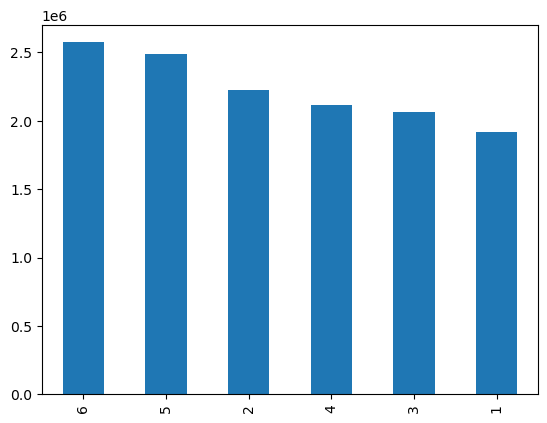

In [13]:
uber_15['month'].value_counts().plot(kind='bar')

In [14]:
uber_15['weekday']=uber_15['Pickup_date'].dt.day_name()
uber_15['day']=uber_15['Pickup_date'].dt.day
uber_15['hour']=uber_15['Pickup_date'].dt.hour
uber_15['month']=uber_15['Pickup_date'].dt.month
uber_15['minute']=uber_15['Pickup_date'].dt.minute

In [15]:
uber_15.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,month,weekday,day,hour,minute
0,B02617,2015-05-17 09:47:00,B02617,141,5,Sunday,17,9,47
1,B02617,2015-05-17 09:47:00,B02617,65,5,Sunday,17,9,47
2,B02617,2015-05-17 09:47:00,B02617,100,5,Sunday,17,9,47
3,B02617,2015-05-17 09:47:00,B02774,80,5,Sunday,17,9,47
4,B02617,2015-05-17 09:47:00,B02617,90,5,Sunday,17,9,47


In [16]:
temp=uber_15.groupby(['month','weekday'], as_index=False).size()
temp.head()

,month,weekday,size
0,1,Friday,339285
1,1,Monday,190606
2,1,Saturday,386049
3,1,Sunday,230487
4,1,Thursday,330319


In [17]:
temp['month'].unique()

array([1, 2, 3, 4, 5, 6], dtype=int64)

In [18]:
dict_month = {1:'Jan', 2:'Feb', 3:'March', 4:'April', 5:'May', 6:'June'}

In [19]:
temp['month']=temp['month'].map(dict_month)

In [20]:
temp['month']

0       Jan
1       Jan
2       Jan
3       Jan
4       Jan
5       Jan
6       Jan
7       Feb
8       Feb
9       Feb
10      Feb
11      Feb
12      Feb
13      Feb
14    March
15    March
16    March
17    March
18    March
19    March
20    March
21    April
22    April
23    April
24    April
25    April
26    April
27    April
28      May
29      May
30      May
31      May
32      May
33      May
34      May
35     June
36     June
37     June
38     June
39     June
40     June
41     June
Name: month, dtype: object

In [21]:
type(uber_15.groupby(['month','weekday']).size())

pandas.core.series.Series

In [22]:
type(uber_15.groupby(['month','weekday'], as_index=False).size())

pandas.core.frame.DataFrame

In [23]:
temp

,month,weekday,size
0,Jan,Friday,339285
1,Jan,Monday,190606
2,Jan,Saturday,386049
3,Jan,Sunday,230487
4,Jan,Thursday,330319
5,Jan,Tuesday,196574
6,Jan,Wednesday,245650
7,Feb,Friday,373550
8,Feb,Monday,274948
9,Feb,Saturday,368311


<Axes: xlabel='month', ylabel='size'>

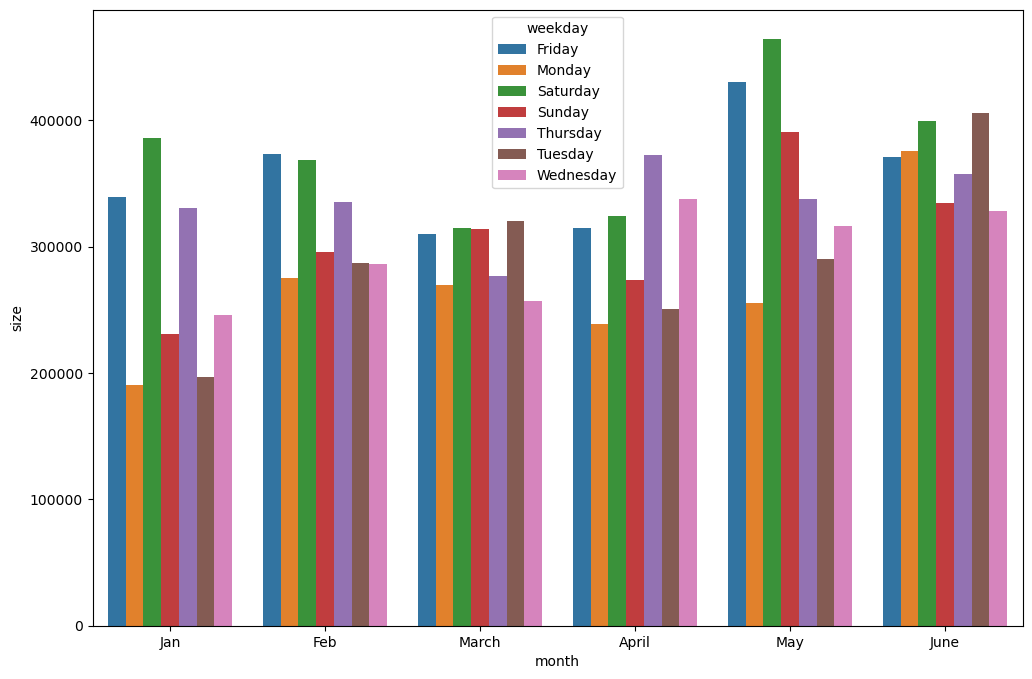

In [24]:
plt.figure(figsize=(12,8))
sns.barplot(x='month', y='size', hue='weekday', data=temp)

In [28]:
summary=uber_15.groupby(['weekday', 'hour'], as_index=False).size()

In [29]:
summary

,weekday,hour,size
0,Friday,0,79879
1,Friday,1,44563
2,Friday,2,27252
3,Friday,3,19076
4,Friday,4,23049
...,...,...,...
163,Wednesday,19,131317
164,Wednesday,20,123490
165,Wednesday,21,120941
166,Wednesday,22,115208


<Axes: xlabel='hour', ylabel='size'>

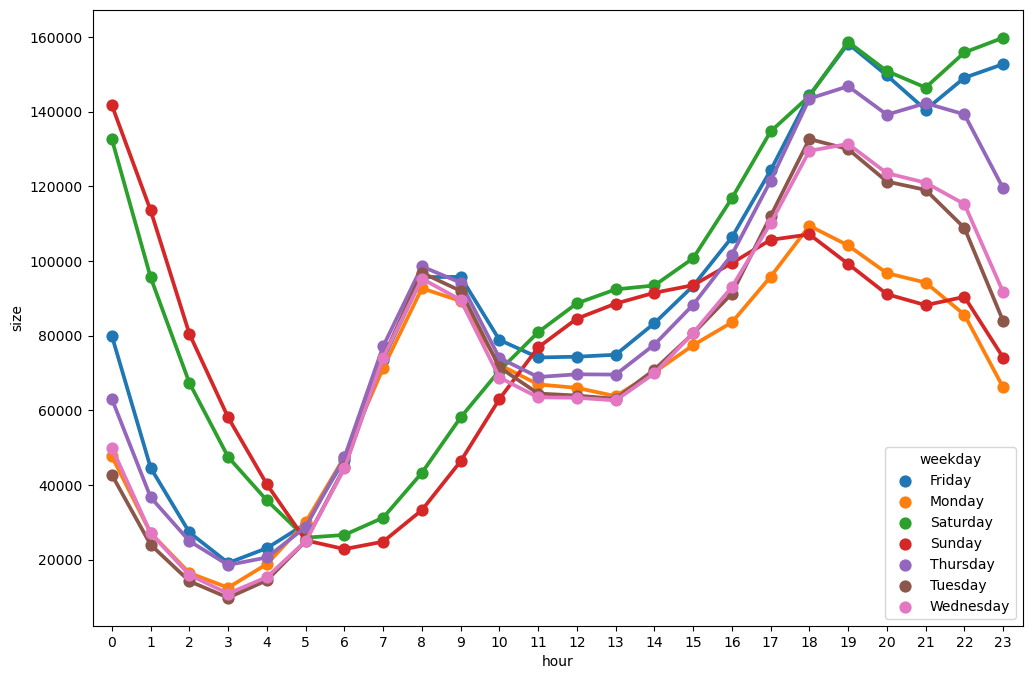

In [30]:
plt.figure(figsize=(12,8))
sns.pointplot(x='hour', y='size', hue='weekday', data=summary)

In [25]:
uber_15.groupby(['weekday', 'hour']).count()

Dispatching_base_num  Pickup_date  Affiliated_base_num  \
weekday   hour                                                           
Friday    0                    79879        79879                78936   
          1                    44563        44563                44064   
          2                    27252        27252                26942   
          3                    19076        19076                18845   
          4                    23049        23049                22798   
...                              ...          ...                  ...   
Wednesday 19                  131317       131317               129724   
          20                  123490       123490               122022   
          21                  120941       120941               119511   
          22                  115208       115208               113909   
          23                   91631        91631                90740   

                locationID   month     day  minute  
weekday   hour                                      
Friday    0          79879   79879   79879   79879  
          1          44563   44563   44563   44563  
          2          27252   27252   27252   27252  
          3          19076   19076   19076   19076  
          4          23049   23049   23049   23049  
...                    ...     ...     ...     ...  
Wednesday 19        131317  131317  131317  131317  
          20        123490  123490  123490  123490  
          21        120941  120941  120941  120941  
          22        115208  115208  115208  115208  
          23         91631   91631   91631   91631  

[168 rows x 7 columns]